In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Dataset
data = pd.read_excel("/Users/krushna/Downloads/data-42/Data_Train.xlsx")
pd.set_option("display.max_columns", None)

In [7]:
data.head()
data['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [4]:
# Missing Values 
data.isnull().mean() 

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [5]:
## There are very less missing values 
#We can use CCA
data.dropna(inplace= True)

In [6]:
data.shape

(10682, 11)

In [7]:
#Cleaning the data for Date_of_Journey
print(data['Date_of_Journey'])

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object


In [8]:
data['Day_of_Journey'] = pd.to_datetime(data.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [9]:
data['Month_of_Journey'] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [10]:
data['Year_of_Journey'] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [11]:
data.drop(['Date_of_Journey'], axis=1 , inplace = True)

In [12]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [13]:
# Cleaning data for Dep_Time
print(data['Dep_Time'])

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object


In [14]:
data['Dep_min'] = pd.to_datetime(data.Dep_Time).dt.minute

/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/2886607276.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_min'] = pd.to_datetime(data.Dep_Time).dt.minute


In [15]:
data['Dep_hour'] = pd.to_datetime(data.Dep_Time).dt.hour

/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/855346756.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_hour'] = pd.to_datetime(data.Dep_Time).dt.hour


In [16]:
data.drop(['Dep_Time'], axis=1 , inplace = True)

In [17]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_min,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,50,16


In [18]:
# Cleaning data for Arrival_Time
print(data['Arrival_Time'])

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object


In [19]:
data['Arr_minute'] = pd.to_datetime(data.Arrival_Time).dt.minute

/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/2851061601.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arr_minute'] = pd.to_datetime(data.Arrival_Time).dt.minute


In [20]:
data['Arr_hour'] = pd.to_datetime(data.Arrival_Time).dt.hour

/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/4185362245.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arr_hour'] = pd.to_datetime(data.Arrival_Time).dt.hour


In [21]:
data.drop(['Arrival_Time'], axis=1 , inplace = True)

In [22]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_min,Dep_hour,Arr_minute,Arr_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,20,22,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,50,5,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,25,9,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,5,18,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,50,16,35,21


In [23]:
# Cleaning data for Duration

duration = list(data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2: # If value != 2h 0m OR 0h 2m 
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i].strip() 

duration_hours = []
duration_minute = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_minute.append(int(duration[i].split(sep = 'm')[0].split()[-1]))        

data['duration_hours']= duration_hours
data['duration_minute'] = duration_minute
data.drop('Duration', axis =1 , inplace= True)

In [24]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_min,Dep_hour,Arr_minute,Arr_hour,duration_hours,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,20,22,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,50,5,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,25,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,5,18,30,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,50,16,35,21,4,45


In [25]:
# cleaning categorical data which is Airline 
data['Airline'].value_counts()


Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [26]:
# Removing jet airways beacause it's no more there 
df = data[data['Airline'] != 'Jet Airways']
# Removing jet airways beacause it's no more there 
df = data[data['Airline'] != 'Jet Airways Business']

In [27]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_min,Dep_hour,Arr_minute,Arr_hour,duration_hours,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,20,22,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,50,5,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,25,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,5,18,30,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,50,16,35,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,55,19,25,22,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,45,20,20,23,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,20,8,20,11,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,30,11,10,14,2,40


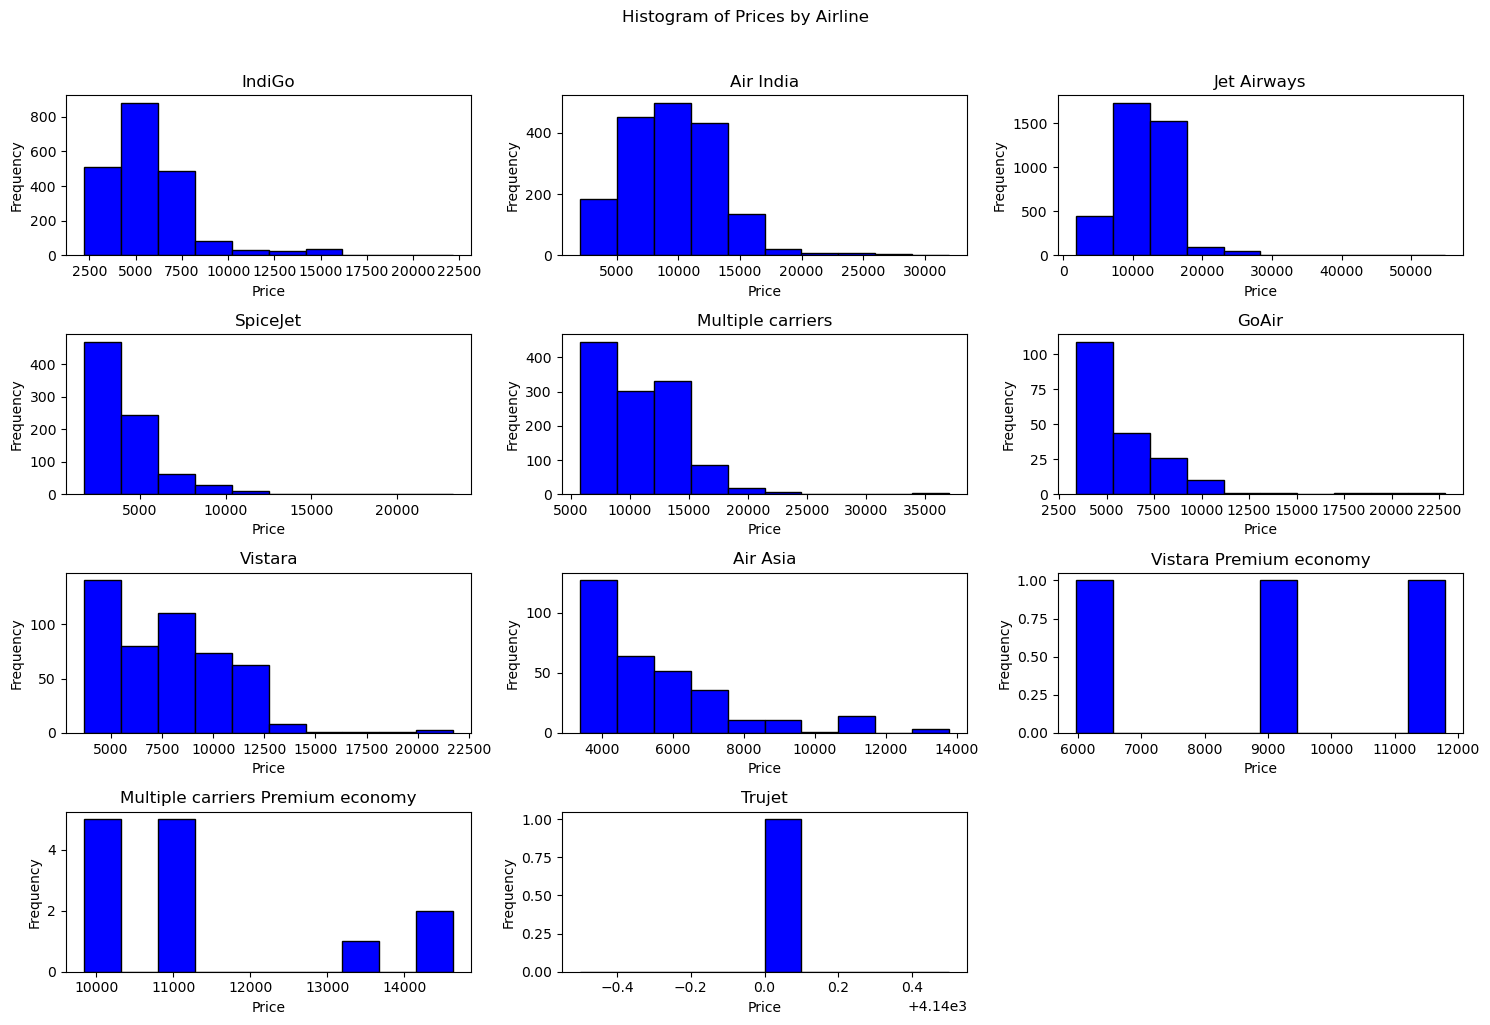

In [28]:
# Plot separate histograms for each airline
airlines = df['Airline'].unique()
n_airlines = len(airlines)

plt.figure(figsize=(15, 10))
for i, airline in enumerate(airlines, 1):
    plt.subplot((n_airlines // 3) + 1, 3, i)
    plt.hist(df[df['Airline'] == airline]['Price'], bins=10, color='blue', edgecolor='black')
    plt.title(airline)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Histogram of Prices by Airline', y=1.02)
plt.tight_layout()
plt.show()

In [29]:
# OnHot Encoding for categorical data and therfore which are Nominal Value
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True )
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False


In [30]:
# Categorical value cleaning which is source
df['Source'].value_counts()

Source
Delhi       4534
Kolkata     2871
Banglore    2193
Mumbai       697
Chennai      381
Name: count, dtype: int64

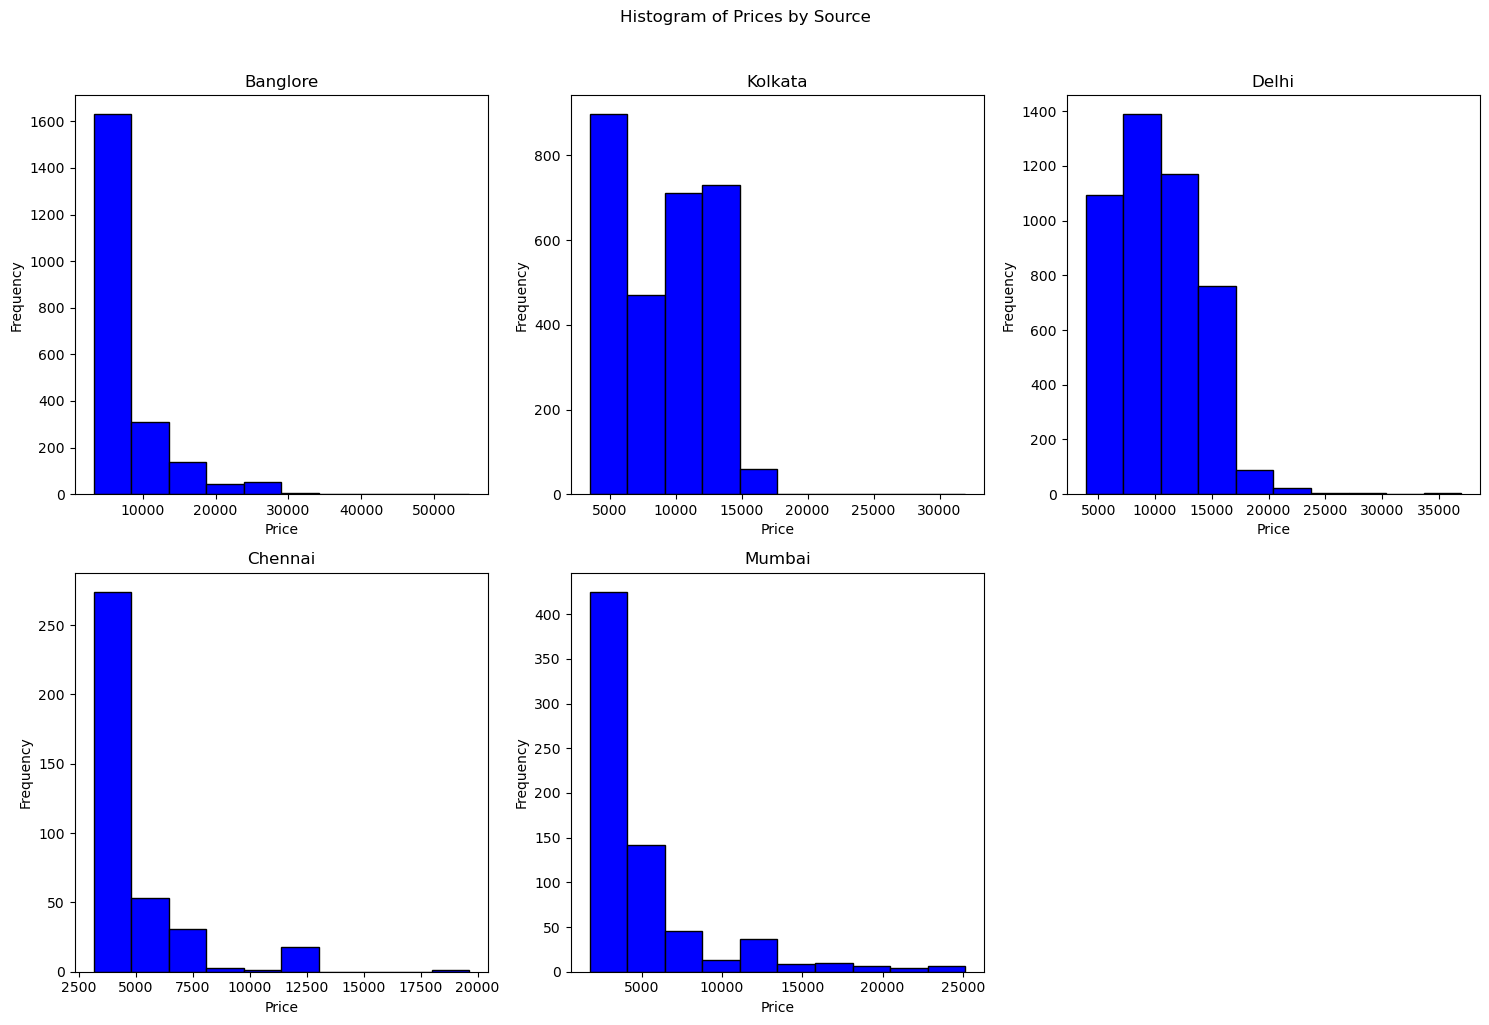

In [31]:
# Plot separate histograms for each source
airlines = df['Source'].unique()
n_airlines = len(airlines)

plt.figure(figsize=(15, 10))
for i, airline in enumerate(airlines, 1):
    plt.subplot((n_airlines // 3) + 1, 3, i)
    plt.hist(df[df['Source'] == airline]['Price'], bins=10, color='blue', edgecolor='black')
    plt.title(airline)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Histogram of Prices by Source', y=1.02)
plt.tight_layout()
plt.show()

In [32]:
# OnHot Encoding for categorical data and therfore which are Nominal Value
Source = df[['Source']]
Source = pd.get_dummies(Source, drop_first = True )
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [33]:
# Cleaning another categorical feature Destintion
df['Destination'].value_counts()

Destination
Cochin       4534
Banglore     2871
Delhi        1265
New Delhi     928
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [34]:
# OnHot Encoding for categorical data and therfore which are Nominal Value
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True )
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [35]:
# W'll drop routes
df.drop('Route', axis=1, inplace= True)

/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/2528591719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Route', axis=1, inplace= True)


In [36]:
df.drop('Additional_Info', axis=1, inplace= True)

/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/1708628466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Additional_Info', axis=1, inplace= True)


In [37]:
df

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_min,Dep_hour,Arr_minute,Arr_hour,duration_hours,duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,20,22,10,1,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,50,5,15,13,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,25,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,5,18,30,23,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,50,16,35,21,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,2019,55,19,25,22,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,2019,45,20,20,23,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,2019,20,8,20,11,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,2019,30,11,10,14,2,40


In [38]:
# Take another categorical variable called Total_Stops
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5621
non-stop    3491
2 stops     1518
3 stops       45
4 stops        1
Name: count, dtype: int64

In [39]:
# Ordinal Category = Label Encoder 
df.replace({"1 stop" : 1 , "non-stop": 0 , "2 stops": 2 , "3 stops" : 3 , "4 stops" : 4}, inplace= True)

/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/2851537009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"1 stop" : 1 , "non-stop": 0 , "2 stops": 2 , "3 stops" : 3 , "4 stops" : 4}, inplace= True)


In [40]:
train_data = pd.concat([df, Source, Destination, Airline], axis=1)

In [41]:
train_data 

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_min,Dep_hour,Arr_minute,Arr_hour,duration_hours,duration_minute,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,20,22,10,1,2,50,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,50,5,15,13,7,25,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,25,9,25,4,19,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,5,18,30,23,5,25,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,50,16,35,21,4,45,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,55,19,25,22,2,30,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,45,20,20,23,2,35,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,20,8,20,11,3,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,30,11,10,14,2,40,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [42]:
train_data.drop(['Airline', 'Source', 'Destination'], axis=1,inplace=True)

In [43]:
train_data

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_min,Dep_hour,Arr_minute,Arr_hour,duration_hours,duration_minute,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,2019,20,22,10,1,2,50,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,2,7662,1,5,2019,50,5,15,13,7,25,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2,13882,9,6,2019,25,9,25,4,19,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,1,6218,12,5,2019,5,18,30,23,5,25,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,1,13302,1,3,2019,50,16,35,21,4,45,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,55,19,25,22,2,30,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10679,0,4145,27,4,2019,45,20,20,23,2,35,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
10680,0,7229,27,4,2019,20,8,20,11,3,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
10681,0,12648,1,3,2019,30,11,10,14,2,40,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


# Test Data

In [44]:
test_data = pd.read_excel("/Users/krushna/Downloads/data-42/Test_set.xlsx")

In [45]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [46]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/1846350894.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/1846350894.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/1846350894.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [47]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


# Feature Eng

In [48]:
train_data.shape

(10676, 30)

In [49]:
 train_data.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Year_of_Journey', 'Dep_min', 'Dep_hour', 'Arr_minute', 'Arr_hour',
       'duration_hours', 'duration_minute', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [50]:
x = train_data.loc[:, ['Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Year_of_Journey', 'Dep_min', 'Dep_hour', 'Arr_minute', 'Arr_hour',
       'duration_hours', 'duration_minute', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]

In [51]:
x

,Total_Stops,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_min,Dep_hour,Arr_minute,Arr_hour,duration_hours,duration_minute,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,24,3,2019,20,22,10,1,2,50,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,2,1,5,2019,50,5,15,13,7,25,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2,9,6,2019,25,9,25,4,19,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,1,12,5,2019,5,18,30,23,5,25,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,1,1,3,2019,50,16,35,21,4,45,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,2019,55,19,25,22,2,30,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10679,0,27,4,2019,45,20,20,23,2,35,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
10680,0,27,4,2019,20,8,20,11,3,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
10681,0,1,3,2019,30,11,10,14,2,40,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [52]:
y = train_data.iloc[: ,1]

In [53]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10676, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


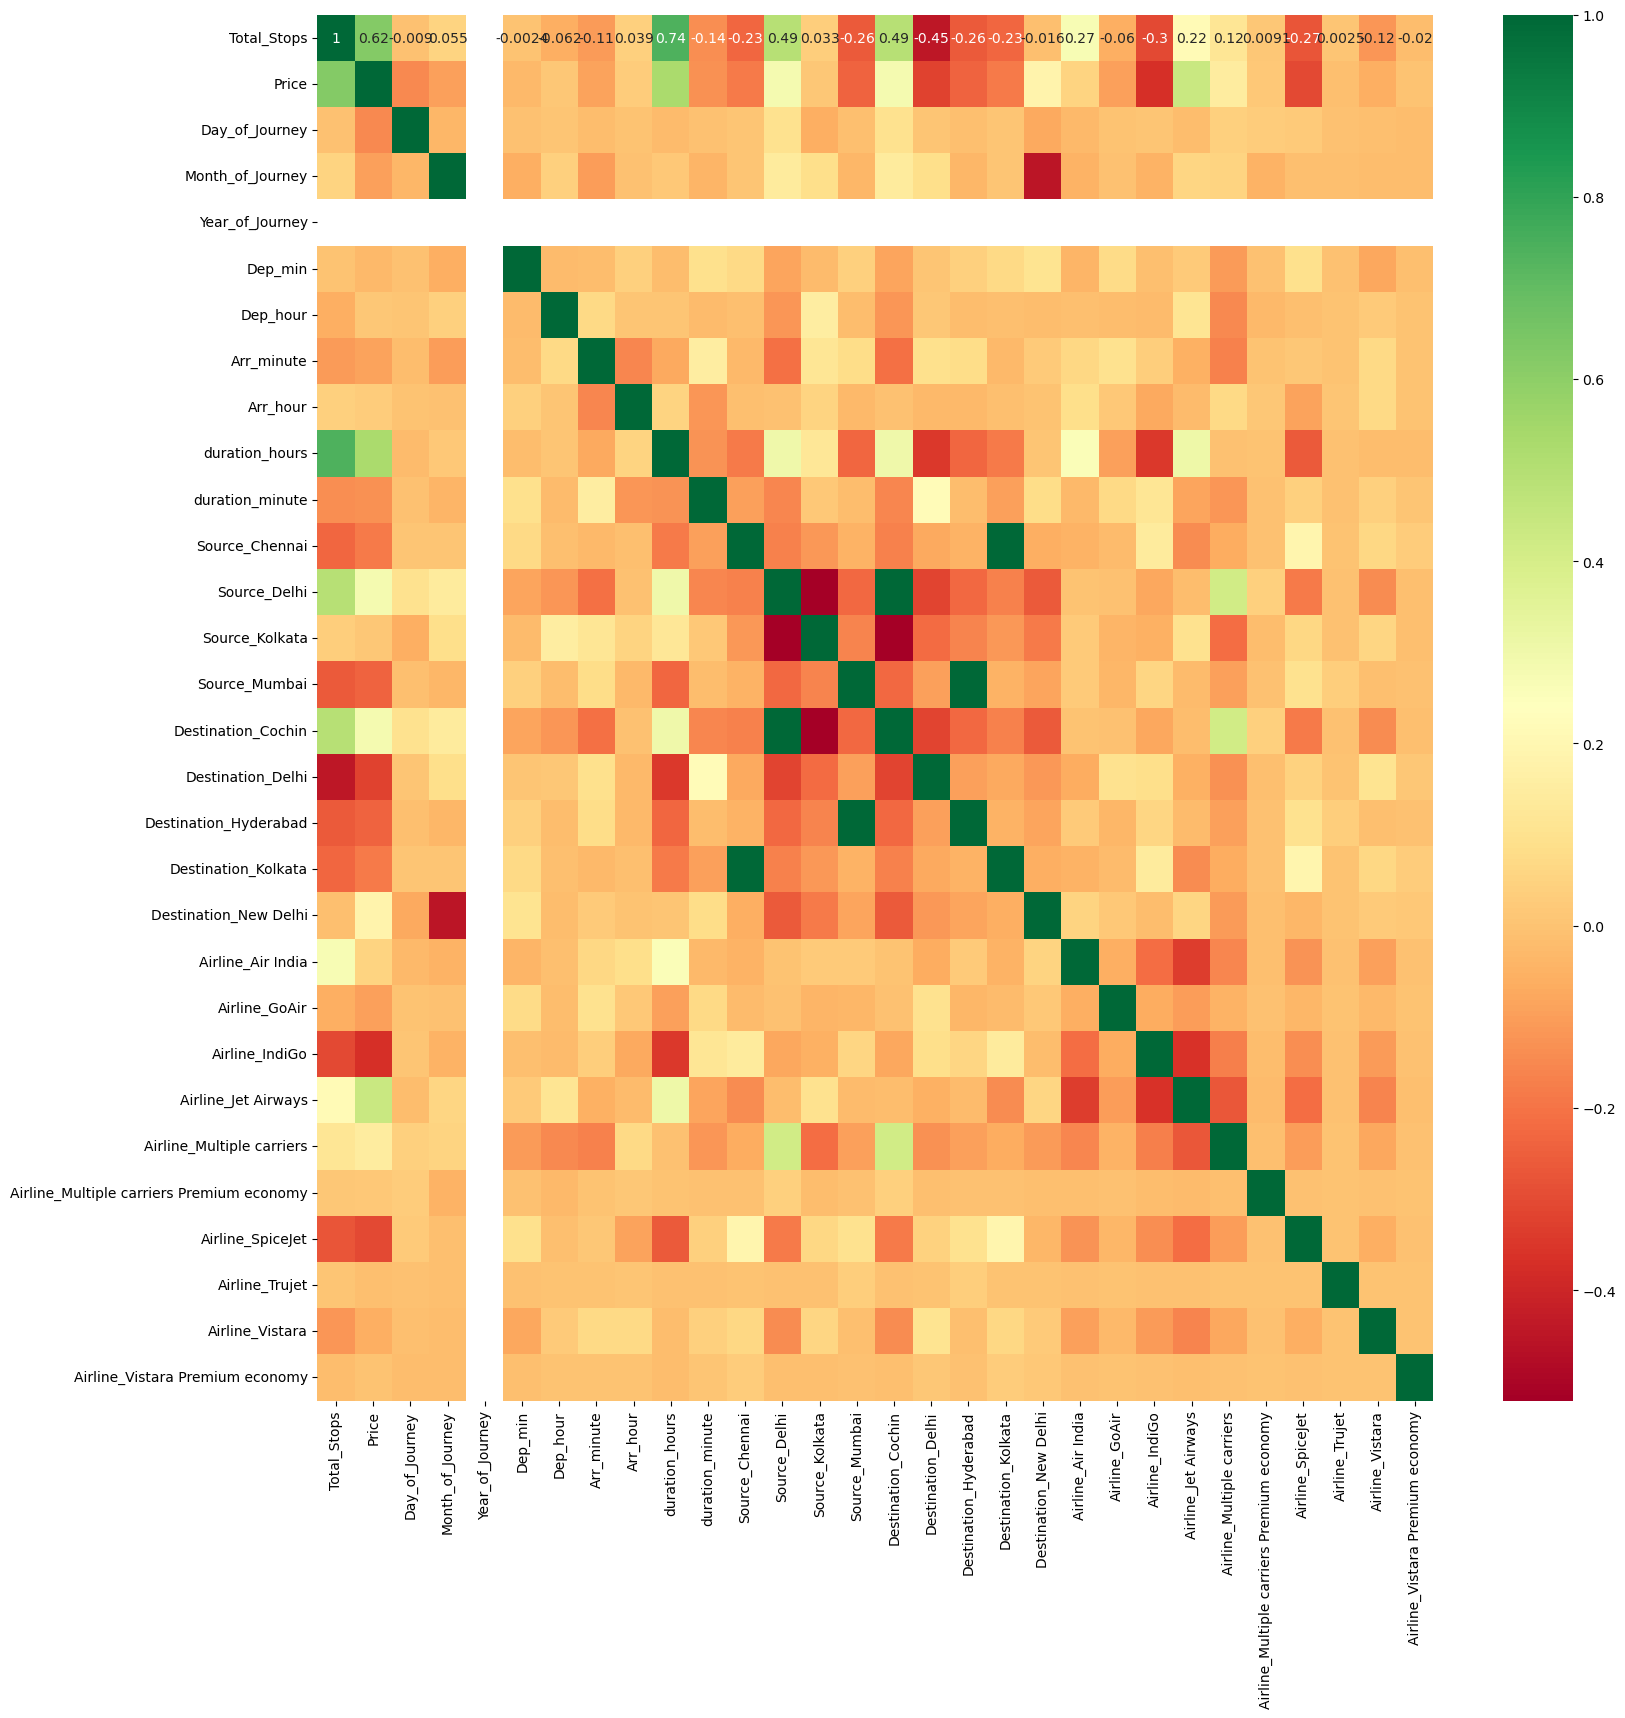

In [54]:
# Correlation bte indepndent and deendent features
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot= True, cmap = 'RdYlGn')

plt.show()

In [55]:
# ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [56]:
print(selection.feature_importances_)

[2.37629686e-01 1.54138755e-01 5.76504351e-02 0.00000000e+00
 2.30772617e-02 2.60314983e-02 1.99776630e-02 2.89628096e-02
 1.28572428e-01 1.80457621e-02 6.27639312e-04 9.75542995e-03
 3.58728915e-03 6.50999903e-03 1.30748478e-02 1.92809571e-02
 7.60091423e-03 4.48791657e-04 2.63581537e-02 1.47319359e-02
 1.80598930e-03 1.53059870e-02 1.52742154e-01 2.42918368e-02
 9.77156161e-04 3.02252465e-03 1.12286642e-04 5.58824530e-03
 9.15641755e-05]


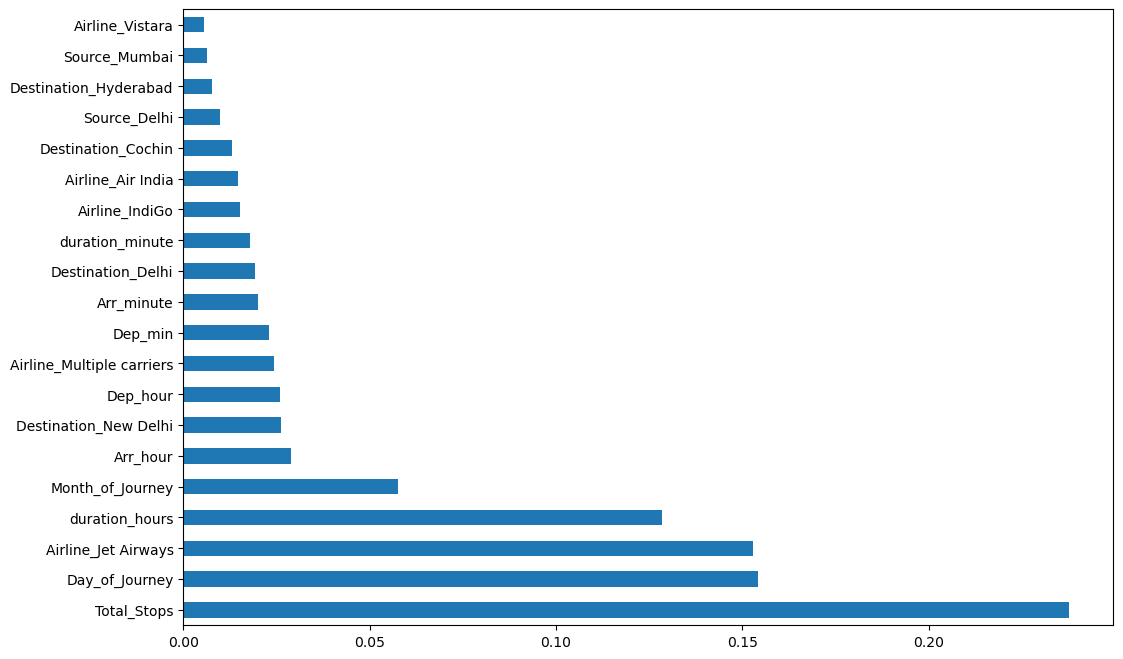

In [57]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_78204/1796520086.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


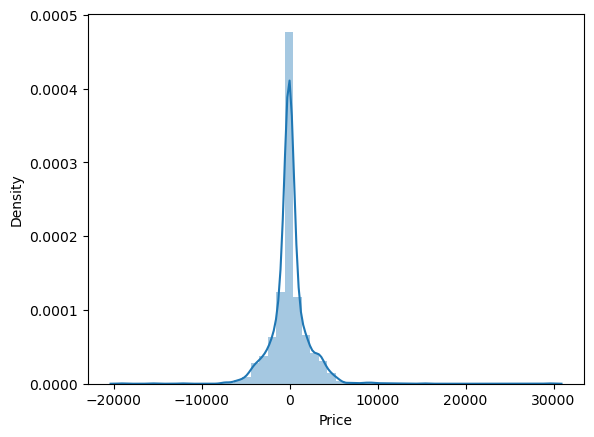

In [58]:
# Fitting model using Random Forest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)
sns.distplot(y_test-y_pred)
plt.show()

In [59]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1232.6682762864605
MSE: 4446284.411450316
RMSE: 2108.6214481149327


In [60]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.03939455593871898

In [61]:
metrics.r2_score(y_test, y_pred)

0.7897994165087587

# Model Hyper Tunning 

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [64]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [65]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
prediction = rf_random.predict(X_test)

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
# Let's make a pickle file 
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [ ]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_prediction)